## Importing Libraries

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## Loading the DataFrames

In [183]:
df = pd.read_csv('/content/drive/MyDrive/ML project data/ML case Study.csv')
df.head()

College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10

In [184]:
DF=pd.read_csv("/content/drive/MyDrive/ML project data/Colleges.csv")
DF.head()

Tier 1          Tier 2                                      Tier 3
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus
3     IIT Madras     NIT Calicut                                 VIT Vellore
4     IIT Kanpur   IIITM Gwalior                             SRM Main Campus

In [185]:
DF1=pd.read_csv("/content/drive/MyDrive/ML project data/cities.csv")
DF1

Metrio City non-metro cities
0      Mumbai         Dehradun
1       Delhi         Durgapur
2     Kolkata          Asansol
3     Chennai         Rourkela
4   Bangalore        Kozhikode
5   Hyderabad  Rajpur Sonarpur
6   Ahmedabad         Kolhapur
7        Pune            Ajmer
8       Surat              NaN

In [186]:
tier_mapping = {}

for tier, tier_name in enumerate(['Tier 1', 'Tier 2', 'Tier 3'], start=1):
    for college in DF[tier_name].dropna():
        tier_mapping[college.strip()] = tier

Cities_mapping = {}

for Cities, Cities_name in enumerate(['Metrio City', 'non-metro cities'], start=1):
    for city in DF1[Cities_name].dropna():
        Cities_mapping[city.strip()] = Cities

df['College Tier'] = df['College'].map(tier_mapping)

df['City Type'] = df['City'].map(Cities_mapping)

df.to_csv('ML case Study.csv', index=False)

In [187]:
df.head()

College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  College Tier  \
0                    3                66           19  71406.58             2   
1                    1                84           18  68005.87             2   
2                    2                52           28  76764.02             3   
3                    2                81           33  82092.39             3   
4                    4                74           32  73878.10             1   

   City Type  
0          2  
1          2  
2          2  
3          2  
4          2

In [188]:
# Dropping two columns College and City
df = df.drop(columns = ['City'], axis = 1)
df = df.drop(columns = ['College'], axis = 1)

df.head()

Role  Previous CTC  Previous job change  Graduation Marks  \
0    Manager       55523.0                    3                66   
1  Executive       57081.0                    1                84   
2  Executive       60347.0                    2                52   
3  Executive       49010.0                    2                81   
4  Executive       57879.0                    4                74   

   EXP (Month)       CTC  College Tier  City Type  
0           19  71406.58             2          2  
1           18  68005.87             2          2  
2           28  76764.02             3          2  
3           33  82092.39             3          2  
4           32  73878.10             1          2

In [189]:
# Checking for any missing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Role                 1589 non-null   object 
 1   Previous CTC         1589 non-null   float64
 2   Previous job change  1589 non-null   int64  
 3   Graduation Marks     1589 non-null   int64  
 4   EXP (Month)          1589 non-null   int64  
 5   CTC                  1589 non-null   float64
 6   College Tier         1589 non-null   int64  
 7   City Type            1589 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


* There are no missing infos

In [190]:
# Putting in dummy variables
df = pd.get_dummies(df, columns = ['Role'], drop_first=True)
df.head()

Previous CTC  Previous job change  Graduation Marks  EXP (Month)       CTC  \
0       55523.0                    3                66           19  71406.58   
1       57081.0                    1                84           18  68005.87   
2       60347.0                    2                52           28  76764.02   
3       49010.0                    2                81           33  82092.39   
4       57879.0                    4                74           32  73878.10   

   College Tier  City Type  Role_Manager  
0             2          2          True  
1             2          2         False  
2             3          2         False  
3             3          2         False  
4             1          2         False

In [191]:
# Convert boolean column to integers
df['Role_Manager'] = df['Role_Manager'].astype(int)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   float64
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   College Tier         1589 non-null   int64  
 6   City Type            1589 non-null   int64  
 7   Role_Manager         1589 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 99.4 KB


In [193]:
# Outlier Treatment
df.describe()

Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
count   1589.000000          1589.000000       1589.000000  1589.000000   
mean   55518.453744             2.528634         59.855255    39.044682   
std     6655.218445             1.123918         14.935139    14.108875   
min    36990.000000             1.000000         35.000000    18.000000   
25%    50518.000000             2.000000         46.000000    26.000000   
50%    55291.000000             3.000000         60.000000    39.000000   
75%    60109.000000             4.000000         73.000000    51.000000   
max    77911.000000             4.000000         85.000000    64.000000   

                 CTC  College Tier    City Type  Role_Manager  
count    1589.000000   1589.000000  1589.000000   1589.000000  
mean    75353.278798      1.975456     1.485840      0.206419  
std     12587.288237      0.838330     0.499957      0.404862  
min     53020.320000      1.000000     1.000000      0.000000  
25%     66902.350000      1.000000     1.000000      0.000000  
50%     73028.670000      2.000000     1.000000      0.000000  
75%     80588.670000      3.000000     2.000000      0.000000  
max    123416.990000      3.000000     2.000000      1.000000

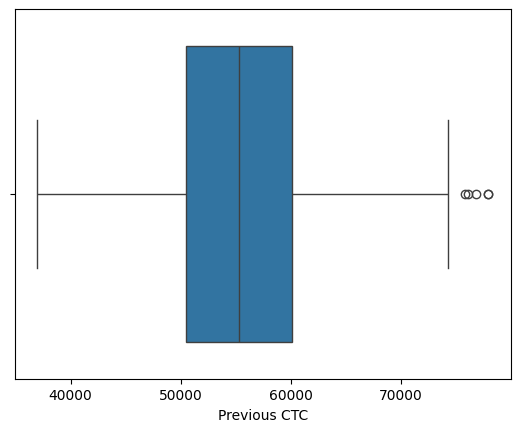

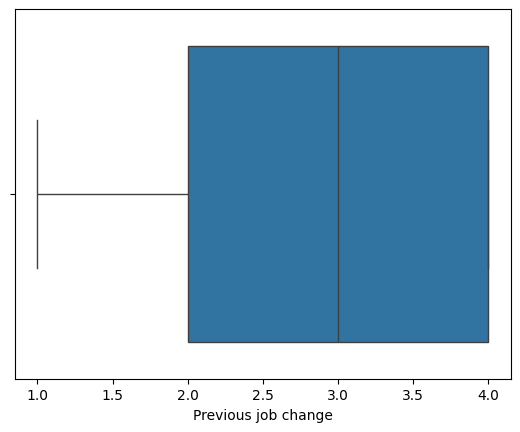

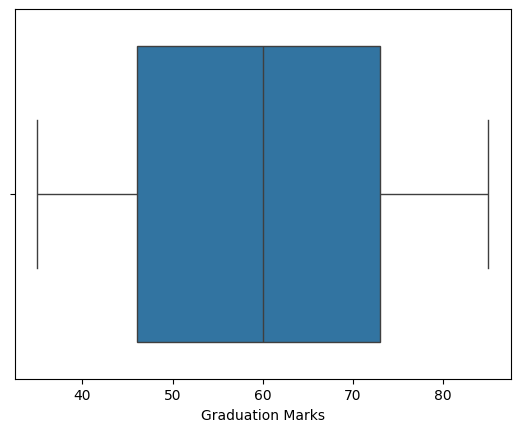

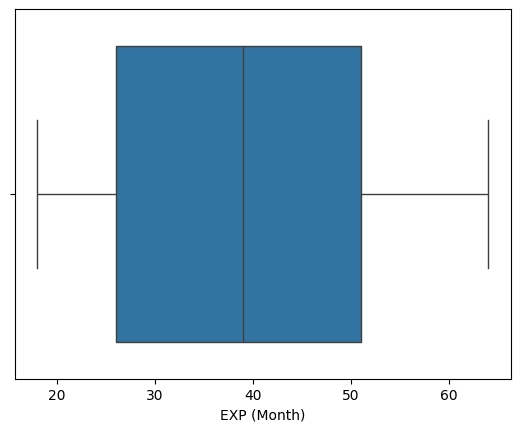

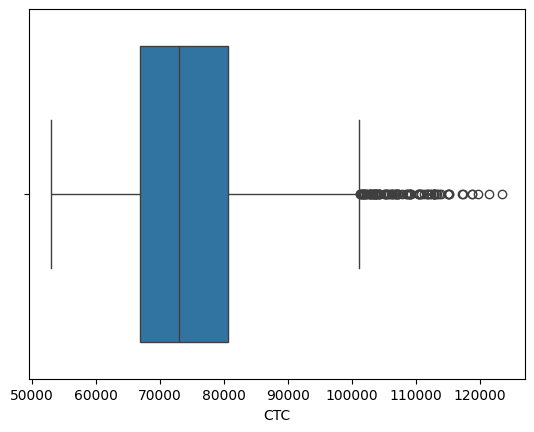

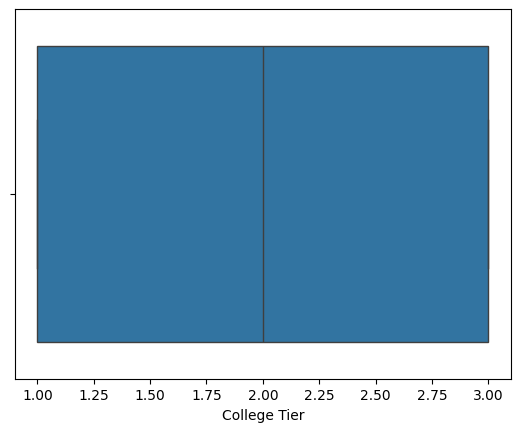

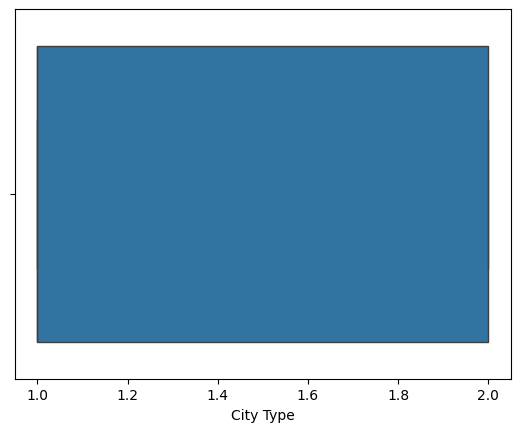

In [194]:
#check for outliers using seaborn

import matplotlib.pyplot as plt

# Create box plots for each numerical feature
for col in df.select_dtypes(include=np.number).columns.drop('Role_Manager'):
    sns.boxplot(x=df[col])
    plt.show()

In [195]:
# Function to treat outliers
def treat_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Columns to treat for outliers (excluding 'Role_Manager')
columns_to_treat = ["Previous CTC", "Previous job change", "Graduation Marks", "EXP (Month)", "CTC", "College Tier", "City Type"]

# Treat outliers
df = treat_outliers(df, columns_to_treat)

print(df.head())

   Previous CTC  Previous job change  Graduation Marks  EXP (Month)       CTC  \
0       55523.0                  3.0              66.0         19.0  71406.58   
1       57081.0                  1.0              84.0         18.0  68005.87   
2       60347.0                  2.0              52.0         28.0  76764.02   
3       49010.0                  2.0              81.0         33.0  82092.39   
4       57879.0                  4.0              74.0         32.0  73878.10   

   College Tier  City Type  Role_Manager  
0           2.0        2.0             1  
1           2.0        2.0             0  
2           3.0        2.0             0  
3           3.0        2.0             0  
4           1.0        2.0             0  


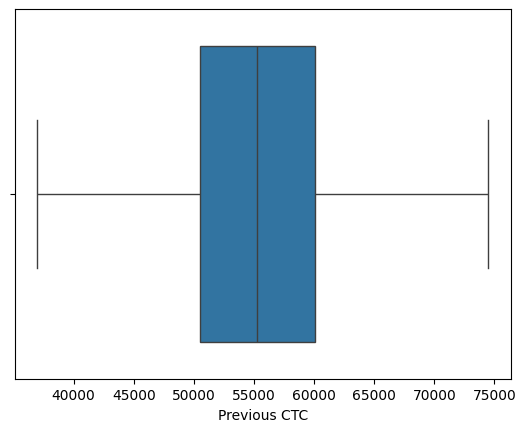

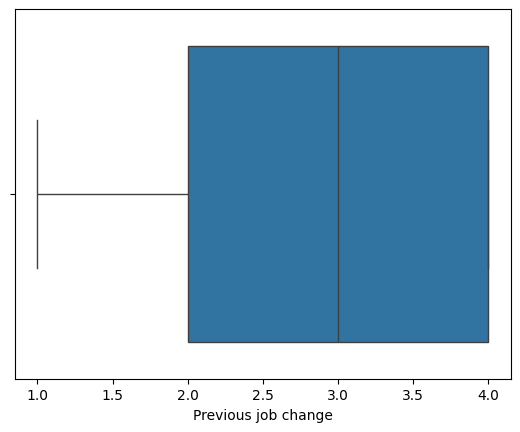

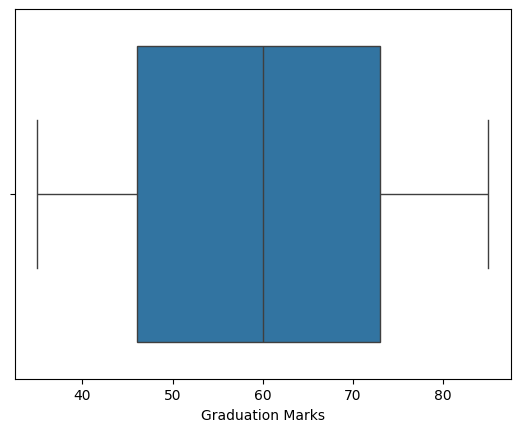

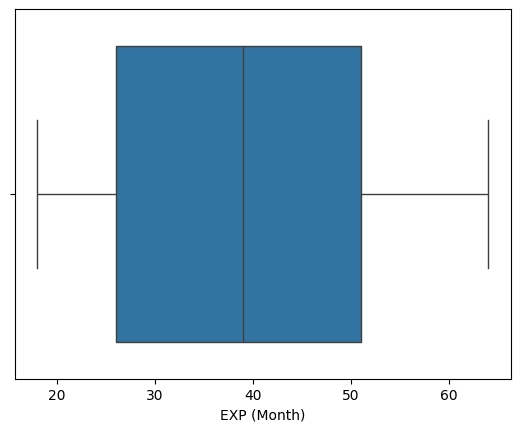

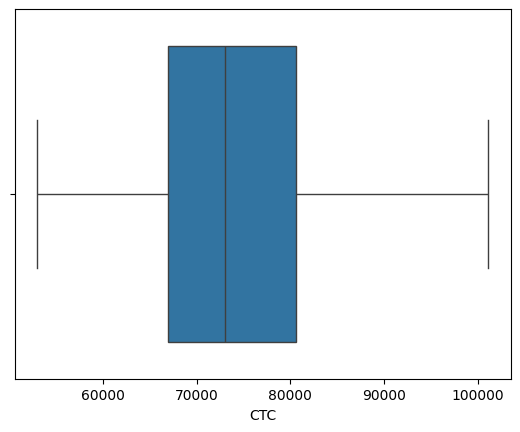

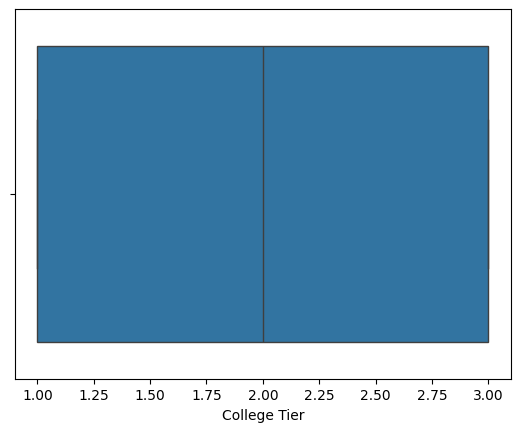

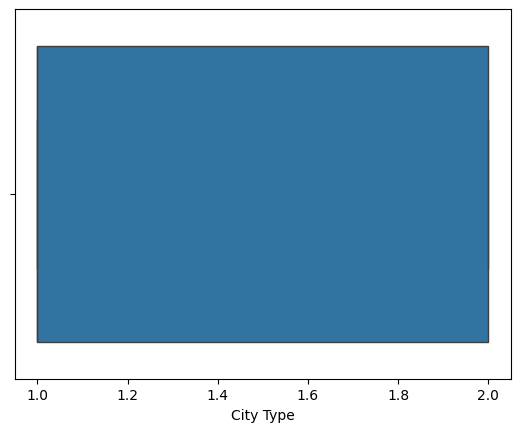

In [196]:
# Check for outliers again
for col in df.select_dtypes(include=np.number).columns.drop('Role_Manager'):
    sns.boxplot(x=df[col])
    plt.show()

## EDA

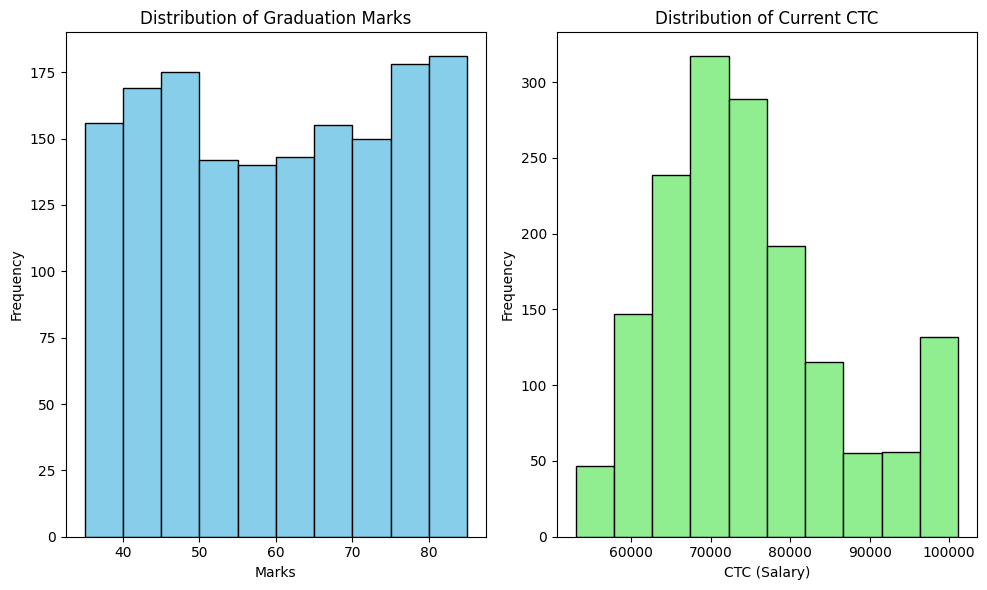

In [197]:
# Plotting Graduation Marks
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Graduation Marks'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Graduation Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency')

# Plotting Current CTC
plt.subplot(1, 2, 2)
plt.hist(df['CTC'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Current CTC')
plt.xlabel('CTC (Salary)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

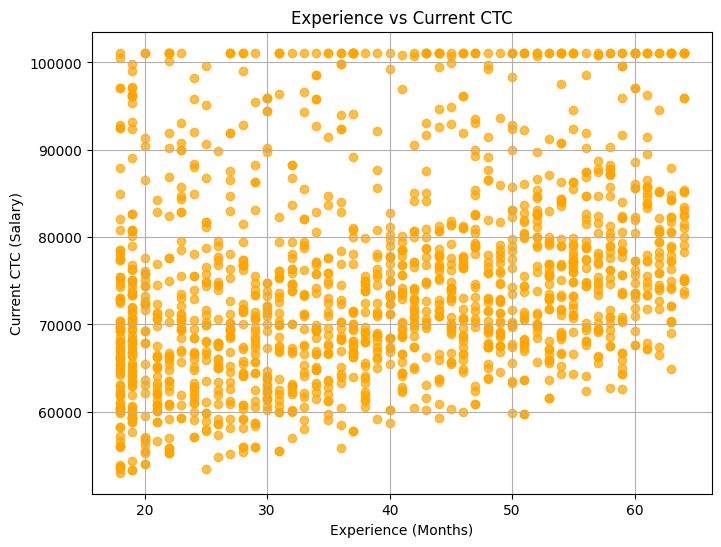

In [198]:
# Plotting Experience vs Current CTC
plt.figure(figsize=(8, 6))
plt.scatter(df['EXP (Month)'], df['CTC'], color='orange', alpha=0.7 )
plt.title('Experience vs Current CTC')
plt.xlabel('Experience (Months)')
plt.ylabel('Current CTC (Salary)')
plt.grid(True)
plt.show()

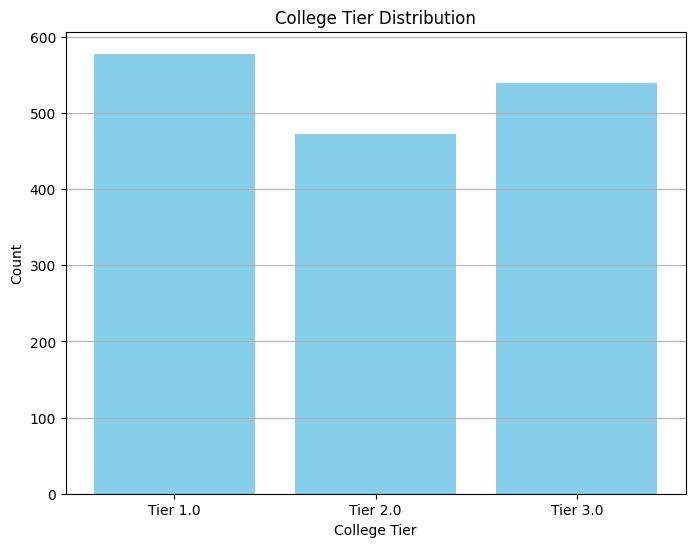

In [199]:
# Plotting College Tier Distribution
tier_counts = df['College Tier'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(tier_counts.index, tier_counts.values, color='skyblue')
plt.title('College Tier Distribution')
plt.xlabel('College Tier')
plt.ylabel('Count')
plt.xticks(ticks=tier_counts.index, labels=[f'Tier {t}' for t in tier_counts.index])
plt.grid(axis='y')
plt.show()

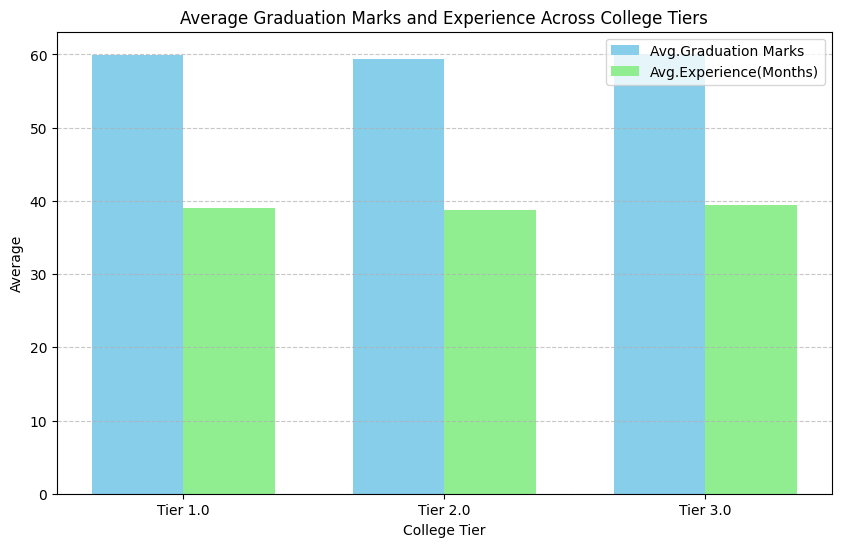

In [200]:
# Plotting Average Graduation Marks and Average Experience
avg_marks = df.groupby('College Tier')['Graduation Marks'].mean()
avg_exp = df.groupby('College Tier')['EXP (Month)'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = avg_marks.index

bar1 = ax.bar(index - bar_width/2, avg_marks, bar_width, label='Avg.Graduation Marks', color='skyblue')
bar2 = ax.bar(index + bar_width/2, avg_exp, bar_width, label='Avg.Experience(Months)', color='lightgreen')

ax.set_xlabel('College Tier')
ax.set_ylabel('Average')
ax.set_title('Average Graduation Marks and Experience Across College Tiers')
ax.set_xticks(index)
ax.set_xticklabels([f'Tier {t}' for t in index])
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

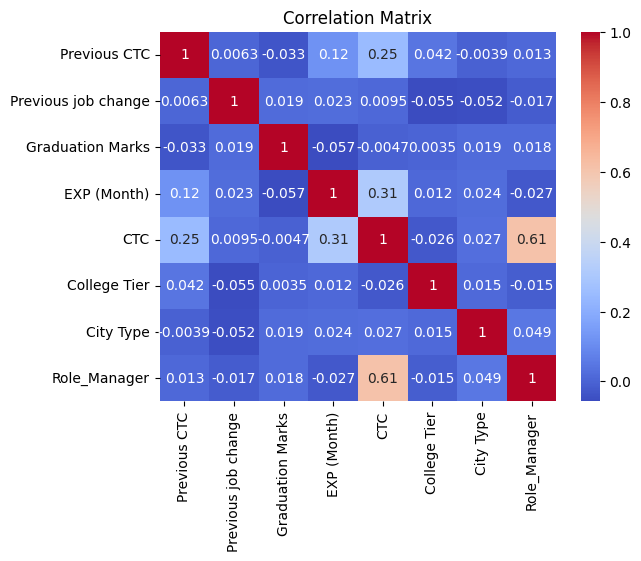

In [201]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# LINEAR REGRESSION

In [202]:
from sklearn.linear_model import LinearRegression

In [203]:
# Defining independent and dependent variables
X = df.drop('CTC', axis = 1)
y = df[['CTC']]

In [204]:
# Using Sklearn model
lm3 = LinearRegression()

In [205]:
# Fitting the model
lm3.fit(X,y)

LinearRegression()

In [206]:
print(lm3.intercept_,lm3.coef_)

[42324.71585522] [[ 3.55674741e-01  9.72181036e+01  6.51729186e+00  2.48135707e+02
  -3.90819833e+02 -2.00536667e+02  1.75692433e+04]]


In [207]:
# Training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [209]:
# Model prediction
y_test_a = lm3.predict(X_test)
y_train_a = lm3.predict(X_train)

In [210]:
# Evaluate the model
r2_score(y_test, y_test_a)

0.5888259423482061

In [211]:
mean_squared_error(y_test, y_test_a)

64479579.71125086

# RIDGE REGRESSION

In [212]:
# Regularizing the model
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [213]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [214]:
param_range = np.logspace(-3, 3, 50)
param_range

array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.12095089e-01,
       2.81176870e-01, 3.72759372e-01, 4.94171336e-01, 6.55128557e-01,
       8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])

In [215]:
train_scores, test_scores = validation_curve(
    Ridge(), X_train, y_train, param_name="alpha", param_range=param_range, cv=5, scoring="r2"
)

In [216]:
# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [217]:
# Find the best alpha value
best_alpha = param_range[np.argmax(test_scores_mean)]
print("Best alpha value for Ridge:", best_alpha)

Best alpha value for Ridge: 1.151395399326447


In [218]:
# Fit the Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

Ridge(alpha=1.151395399326447)

In [219]:
# Make predictions
y_pred = ridge_best.predict(X_test)

In [220]:
# Evaluate the model
print("Ridge Regression Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print("Ridge Regression Coefficient (R^2): %.2f" % r2_score(y_test, y_pred))

Ridge Regression Mean squared error (MSE): 66135662.71
Ridge Regression Coefficient (R^2): 0.58


# LASSO REGRESSION

In [221]:
# Lasso Regression
from sklearn.linear_model import Lasso

In [222]:
train_scores_lasso, test_scores_lasso = validation_curve(
    Lasso(), X_train, y_train, param_name="alpha", param_range=param_range, cv=5, scoring="r2"
)

In [223]:
# Calculate mean and standard deviation of training and test scores
train_scores_mean_lasso = np.mean(train_scores_lasso, axis=1)
train_scores_std_lasso = np.std(train_scores_lasso, axis=1)
test_scores_mean_lasso = np.mean(test_scores_lasso, axis=1)
test_scores_std_lasso = np.std(test_scores_lasso, axis=1)

In [224]:
# Find the best alpha value
best_alpha_lasso = param_range[np.argmax(test_scores_mean_lasso)]
print("Best alpha value for Lasso:", best_alpha_lasso)

Best alpha value for Lasso: 104.81131341546852


In [225]:
# Fit the Lasso model with the best alpha
lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_train, y_train)

Lasso(alpha=104.81131341546852)

In [226]:
# Make predictions
y_pred_lasso = lasso_best.predict(X_test)

In [227]:
# Evaluate the model
print("Lasso Regression Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression Coefficient of determination (R^2): %.2f" % r2_score(y_test, y_pred_lasso))

Lasso Regression Mean squared error (MSE): 66839113.81
Lasso Regression Coefficient of determination (R^2): 0.57


# LOGISTIC REGRESSION

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, confusion_matrix

In [229]:
df.head()

Previous CTC  Previous job change  Graduation Marks  EXP (Month)       CTC  \
0       55523.0                  3.0              66.0         19.0  71406.58   
1       57081.0                  1.0              84.0         18.0  68005.87   
2       60347.0                  2.0              52.0         28.0  76764.02   
3       49010.0                  2.0              81.0         33.0  82092.39   
4       57879.0                  4.0              74.0         32.0  73878.10   

   College Tier  City Type  Role_Manager  
0           2.0        2.0             1  
1           2.0        2.0             0  
2           3.0        2.0             0  
3           3.0        2.0             0  
4           1.0        2.0             0

In [230]:
# Using sklearn method
X = df.drop('Role_Manager', axis = 1)
y = df['Role_Manager']

In [231]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
clf_lrs = LogisticRegression()

In [233]:
clf_lrs.fit(X_train,y_train)

LogisticRegression()

In [234]:
print("Coeff :", clf_lrs.coef_)
print("Intercept :", clf_lrs.intercept_)

Coeff : [[-0.00021891 -0.00362335 -0.02726904 -0.05208974  0.00018098 -0.00081396
  -0.00057723]]
Intercept : [-0.00099275]


In [235]:
# Make predictions on the test data
y_pred = clf_lrs.predict(X_test)

In [236]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [237]:
print("Accuracy: {:.2f}".format(accuracy))
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.89
Confusion Matrix:
 [[237  10]
 [ 26  45]]


In [238]:
precision_score(y_test, y_pred)

0.8181818181818182

In [239]:
recall_score(y_test, y_pred)

0.6338028169014085

In [240]:
roc_auc_score(y_test, y_pred)

0.7966584934709471

# LINEAR DISCRIMINANT ANALYSIS

In [241]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [242]:
# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

In [243]:
# Fit the model
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [244]:
# Make predictions
y_pred = lda.predict(X_test)

In [245]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [246]:
print("Accuracy: {:.2f}".format(accuracy))
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.91
Confusion Matrix:
 [[238   9]
 [ 21  50]]


# DECISION TREE

In [247]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

In [248]:
X = df.drop('CTC', axis =1)
y = df['CTC']

In [249]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [250]:
regtree = DecisionTreeRegressor(max_depth = 3)
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [251]:
# Make predictions on the test data
y_pred = regtree.predict(X_test)

In [252]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [253]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 65097378.13584342
R-squared (R2): 0.5848863588988698


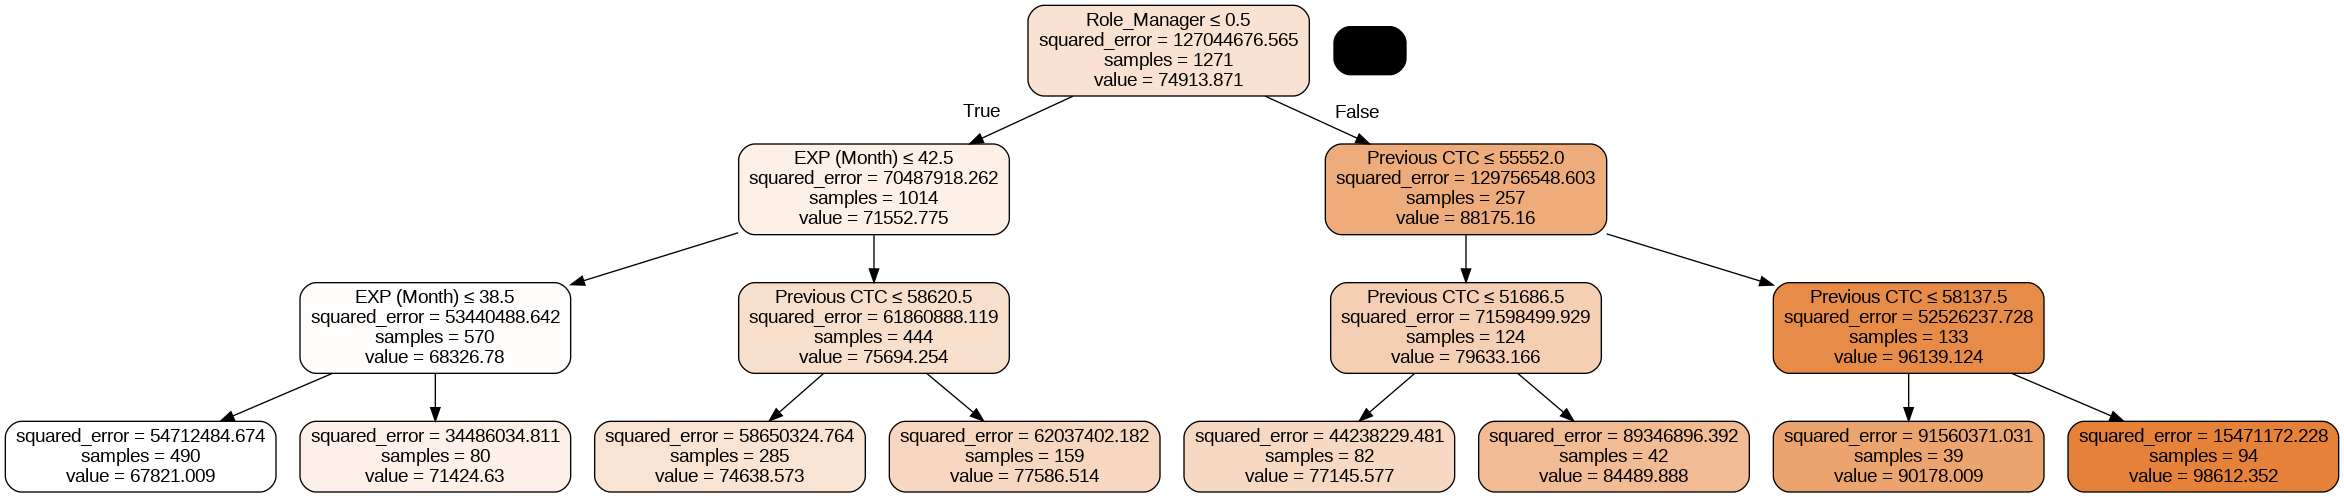

In [254]:
# Visualize the decision tree
dot_data = export_graphviz(regtree, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph
Image(graph.create_png())

* Graphviz is used to generate dot data for best decision tree

# GRADIENT BOOSTING

In [255]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [256]:
X = df.drop('CTC', axis=1)
y = df['CTC']

In [257]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [258]:
GB = GradientBoostingRegressor(random_state=42)
GB.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [259]:
y_pred = GB.predict(X_test)

In [260]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [261]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 61963764.12752149
R-squared (R2): 0.604868821450365


# RANDOM FOREST

In [262]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [263]:
RF = RandomForestRegressor(random_state=42)
RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [264]:
# Make predictions
y_pred = RF.predict(X_test)

In [266]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [267]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 58091947.300938256
R-squared (R2): 0.6295586634468529


# ADA BOOSTING

In [268]:
from sklearn.ensemble import AdaBoostRegressor

In [269]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
# Initialize the base estimator
base_estimator = DecisionTreeRegressor(max_depth=3)

In [271]:
# Initialize the AdaBoost Regressor model
ada = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

In [272]:
# Train the AdaBoost regressor
ada.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  random_state=42)

In [273]:
# Make predictions on the test set
y_pred = ada.predict(X_test)

In [274]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 68180780.37547614
R-squared: 0.5652240872786161


# XGBOOST

In [275]:
from xgboost import XGBRegressor

In [276]:
# Initialize XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

In [277]:
# Train the XGBoost regressor
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [278]:
# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

In [279]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 63208425.999457955
R-squared: 0.5969318486198909


# QUESTIONS AND ANSWERS

**1. Your views about the problem statement?**

TechWorks takes into account a number of variables, such as experience, education, performance, market prices, specialized job skills, and living expenses. TechWorks attracts and retains top talent by making sure salaries are competitive with industry standards. More experience and specialized skills are rewarded with higher salaries, and compensation packages are modified in response to changes in the labor market and cost of living. This adaptable, data-driven approach to pay helps TechWorks continue to attract the best IT talent and satisfy the changing demands of the sector. Hence, the ability of TechWorks Consulting, to determine and provide reasonable and competitive salaries to its employees is the primary concern raised by the problem statement.

**2. What will be your approach to solving this task?**

My approach would be to

(1) Analyze the datas that were provided - College, Cities and ML case study.

(2) Data preprocessing - missing values, outliers treatment.

(3) Get all the categorical variables to numerical variables.

(4) Using EDA find out the relationships between variables.

(5) Use various models and analyze which model is providing better R2 and the best fit model.


**3. What were the available ML model options you had to perform this task?**

The available ML model options were:

(1) Linear Regression - Linear regression models which is used to predict salaries based on various factors such as experience, qualifications, and performance.

(2) Ridge and Lasso Regression - Regularized regression models that helps in handling multicollinearity and feature selection.

(3) Linear Discriminant Analysis(LDA) - It is primarily used for classification but can be adapted for regression by transforming the regression problem into a classification one.

(4) Decision Tree - A non-linear model that splits the data into subsets based on feature values.

(5) Random Forest - An ensemble model that combines multiple decision trees to improve accuracy and control over-fitting.

(6) Gradient Boosting - A sequential ensemble method that builds models to correct errors from previous models.

(7) Ada Boosting - An ensemble learning technique that combines multiple weak learners to form a strong predictive model

(8) XGBoost - An optimized version of gradient boosting focused on speed and performance.

**4. Which model’s performance is best and what could be the possible reason for that?**

Linear Regression - 0.58

Ridge Regression - 0.58

Lasso Regression - 0.57

Logistc Regression - 0.89

Linear Discriminant Analysis(LDA) - 0.91

Decision Tree - 0.58

Gradient Boosting - 0.60

Random Forest - 0.62

AdaBoosting - 0.56

XGBOOST - 0.59

Based on the above models, we can say that Linear Discriminant Analysis(LDA) and Logistic Regression are providing with better R2 and hence this indicates better fit of the model to the data.



**5. What steps can you take to improve this selected model’s performance even further?**

To further improve the model's performance, we can use advanced techniques such as Neural network models. Also, we can implement hyperparametric tuning and feature engineering for better performance.

